In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [74]:
insurance_dt = pd.read_csv('insurance.csv')

In [75]:
insurance_dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
insurance_dt.shape

(1338, 7)

In [77]:
insurance_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [78]:
insurance_dt.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

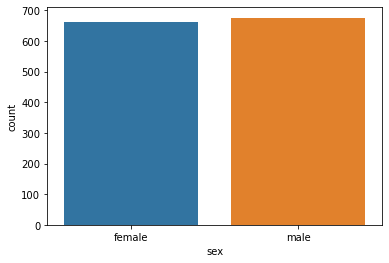

In [79]:
sns.countplot(insurance_dt.sex)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

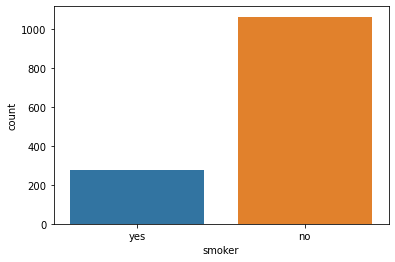

In [80]:
sns.countplot(insurance_dt.smoker)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

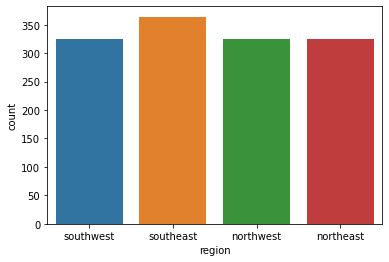

In [81]:
sns.countplot(insurance_dt.region)

In [82]:
insurance_dt = pd.get_dummies(insurance_dt, columns=['region'])


In [83]:
insurance_dt = pd.get_dummies(insurance_dt, columns=['smoker'])


In [84]:
insurance_dt = pd.get_dummies(insurance_dt, columns=['sex'])

In [85]:
insurance_dt.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,1


In [86]:
insurance_dt.describe()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242152,0.242900,0.272048,0.242900,0.795217,0.204783,0.494768,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.428546,0.428995,0.445181,0.428995,0.403694,0.403694,0.500160,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
X = insurance_dt.drop(['charges'], axis=1)
Y = insurance_dt['charges']

In [88]:
X.head()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,0,0,0,1,0,1,1,0
1,18,33.770,1,0,0,1,0,1,0,0,1
2,28,33.000,3,0,0,1,0,1,0,0,1
3,33,22.705,0,0,1,0,0,1,0,0,1
4,32,28.880,0,0,1,0,0,1,0,0,1


In [89]:
 Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2, test_size=0.2)

In [106]:
model = LogisticRegression()

In [107]:
model.fit(X_train, Y_train)

ValueError: Unknown label type: 'continuous'

In [108]:
model2 = LinearRegression()

In [109]:
model2.fit(X_train, Y_train)

LinearRegression()

In [110]:
train_pred = model2.predict(X_train)
train_ped_acc = metrics.r2_score(Y_train, train_pred)
train_ped_acc

0.7520187377309014

In [111]:
test_pred = model2.predict(X_test)
test_pred_accu = metrics.r2_score(Y_test, test_pred)
test_pred_accu

0.7449415564623687